# SHapley Additive exPlanations

SHapley Additive exPlanations (SHAP) is a framework for explaining the output of machine learning models. It is based on Shapley values, a concept from cooperative game theory that assigns a value to each player in a coalition based on their marginal contributions to the end-goal of the game. In the context of machine learning, SHAP values provide a way to fairly distribute the contribution of each feature to the prediction of a model (classification or regression). They help interpret the model's output, offering insights into the importance and impact of individual features on the model's decision.

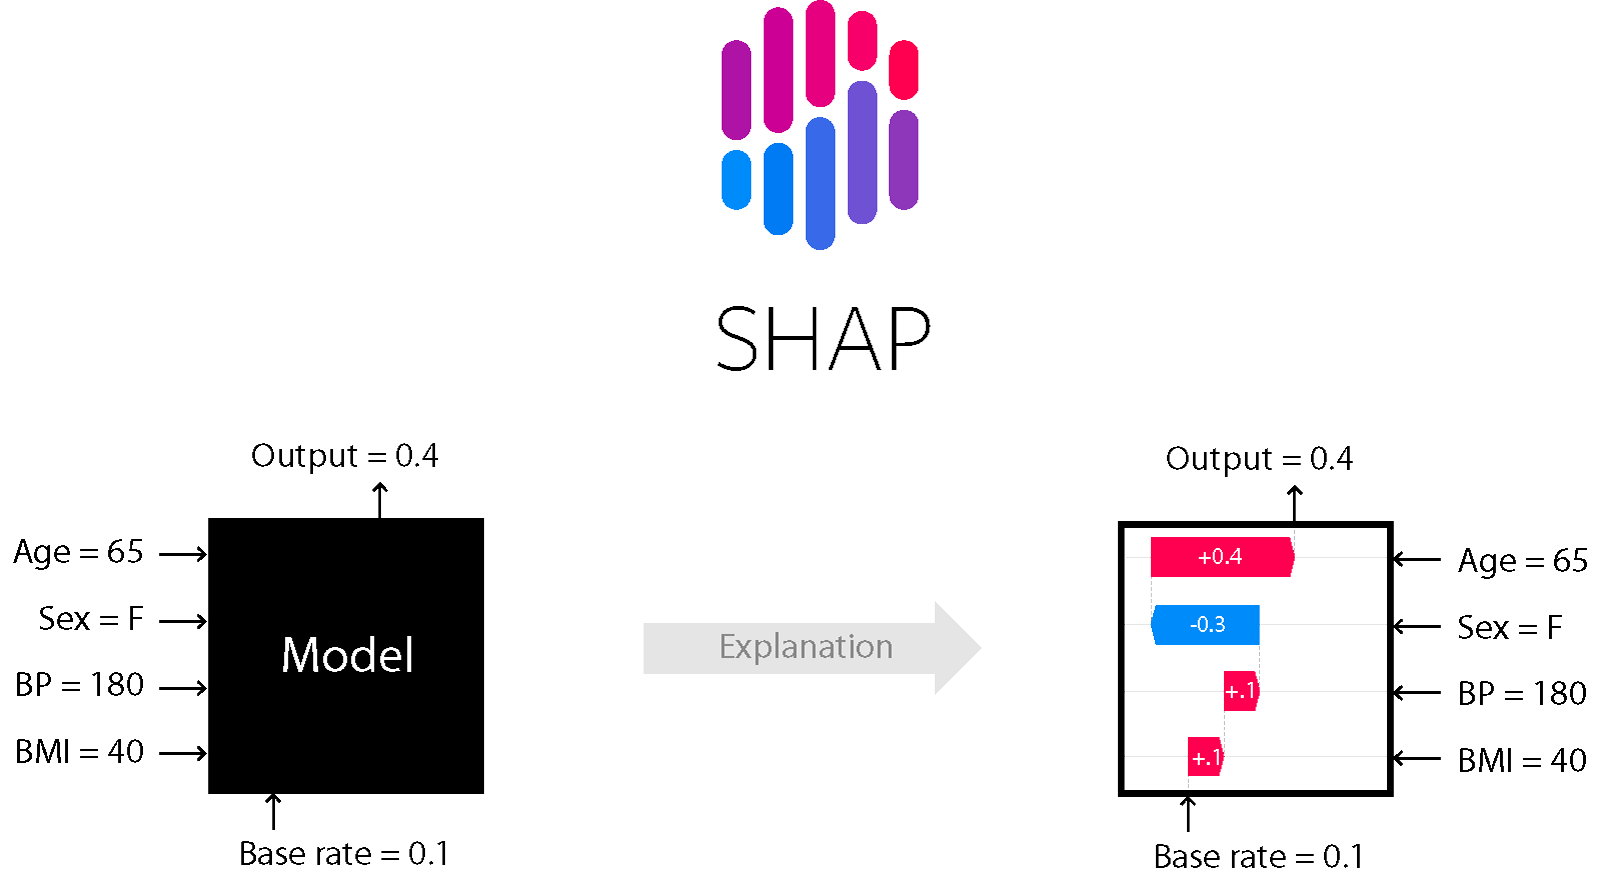

Source: https://shap.readthedocs.io/en/latest/#

The Shapley value is calculated by considering all possible combinations of features and determining the average contribution of a particular feature across all possible combinations.

Here's a simplified explanation of how it works:
1. **All Possible Combinations**: For each prediction, all possible combinations of features are considered, ranging from subsets with only one feature to the full set of features.
2. **Contribution Calculation**: The contribution of a feature is calculated for each combination by comparing the model's prediction with and without that specific feature.
3. **Weighted Average**: Shapley values are obtained by taking the average contribution of a feature across all combinations.
4. **Interpretation**: Positive Shapley values indicate how much a feature contributes to the positive class prediction, while negative values represent the contribution to the negative class prediction.

In summary, SHAP provides a way to distribute the model's prediction among its input features fairly, helping to understand the importance of each feature in the overall decision-making process.

## Settings

In [ ]:
# import python packages
import shap
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# allow multiple outputs of a cell to be displayed

In [ ]:
'A'
'B'

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
'A'
'B'

## Data set

We are going to continue to follow this paper: \
"A Prediction Model to Prioritize Individuals for a SARS-CoV-2 Test Built from National Symptom Surveys" by Shoer et al.,\
Cell Med https://doi.org/10.1016/j.medj.2020.10.002.

**Introduction**\
The rapid and global spread of COVID-19 led the World Health Organization (WHO) to declare it a pandemic on March 11, 2020. One major factor that contributed to the spread of the virus is the apparently large number of undiagnosed infected individuals. This knowledge gap facilitates the silent propagation of the virus, delays the response of public health officials, and results in an explosion in the number of cases.

One reason for this knowledge gap in the early days of the pandamic was insufficient testing. While the gold standard for COVID-19 diagnosis is detection of viral RNA in a reverse transcription PCR test, the number of tests was limited. In a time when almost all countries were faced with the same health challenge, resources were scarce. This created the need for a prioritization mechanism to allocate tests and resources more efficiently toward individuals who are more likely to test positive, leading to earlier identification of COVID-19 patients, social isolation, and reduced spread of the virus.

The paper presents a model that provides estimates of the probability of an individual to test positive for SARS-CoV-2 infection in a PCR test, based on a national symptom survey that was distributed in Israel. Using the model, the risk for a positive COVID-19 test can be evaluated in less than a minute and without added costs or risk of exposure to a suspected patient. This approach was used to make more efficient use of available testing capacities, by significantly increasing the fraction of positive tests obtained, and by rapidly identifying individuals that should be isolated until definitive test results are obtained.

The **goal** of this tutorial is to re-create such model using Gradient Boosting Decision Trees (part 1), and to gain insight into the features that contribute most to the predicted probability of being diagnosed with COVID-19 (part 2).

In [ ]:
# copy the model from the first section of the tutorial to your local directory
!cp /home/projects/aihubadm/aihub_shared/ex-trees-shap/model.pkl .

# and the data as it was used to train the model
!cp /home/projects/aihubadm/aihub_shared/ex-trees-shap/data_clean.csv .

In [ ]:
# load the model 
model = pickle.load(open('model.pkl', 'rb'))

# and the data
df = pd.read_csv('data_clean.csv', index_col=0)

## Decipher the model

The SHAP value for a particular sample and feature represents their marginal contribution to the prediction. In other words, it quantifies how much the inclusion of a particular feature influences the model's output for that specific sample.

A positive SHAP value for a feature indicates that the feature value contributes to the positive prediction of the model for the given instance. Conversely, a negative SHAP value suggests contribution to the negative prediction.

The absolute of the SHAP value represents the overall importance of the feature for a specific prediction. Larger absolute SHAP values indicate a greater influence of the corresponding feature on the model's output.

Compute the SHAP value for every feature and instance in the dataset and save them in a variable\
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html

Look at the SHAP values dimensions, what do the rows and columns represnt?

Plot the SHAP values for a thousand random samples (otherwise it takes a long time)
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html

What is f(x)?

What are the bars to the right of the heatmap?

What does the color indicate?

## Feature importance

Plot the SHAP values just for the first sample\
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html

What are the numbers next to the bars?

What are the numbers next to the feature names?

How old is this person?

In what scenarios might the interpretation of SHAP values become ambiguous or less reliable, and how can practitioners mitigate such challenges?

Based on the SHAP values, compute the model's prediction for the first instance

Hint: if the scales do not match, look at the model_output parameter in the shap.TreeExplainer, it can be used in the shap.Explainer as well \
https://shap.readthedocs.io/en/latest/generated/shap.TreeExplainer.html

Is it the same as the model's prediction?

Plot the SHAP values for all instances\
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html

How is the global importance of each feature calculated?

Which symptom (not age) contributes most to the prediction?

Plot a beeswarm plot of the SHAP values \
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html

How is it different from the bar plot?

What does each dot represent?

What does the color of the dot represent?

Having which symptom contributes most to the prediction of being covid positive?

Does having a symptoms is as important for the prediction as not having it?

Within a certain feature what does the vertical dispersion represent?

How do we interpret the variability in SHAP values across instances and features, and what implications does it have for assessing the reliability of feature contributions to model predictions?

## Feature dependence

The XGBoost model we trained in the previous section is very complicated, but by plotting the SHAP value for a feature against the actual value of the feature for all instances we can see how changes in the feature’s value effect the model’s output. 

Note that this plot just explains how the XGBoost model works, not nessecarily how reality works. Since the XGBoost model is trained from observational data, it is not nessecarily a causal relationship.

Plot a shap dependence plot for age (use shap.dependence_plot but notice that in newer versions of shap and its documentation its called scatter)\
https://shap.readthedocs.io/en/latest/generated/shap.plots.scatter.html#shap.plots.scatter

Which age group is the least likely to have covid according to the model?

What did the model learn about age?

Plot the same shap dependence plot for age, but now color it by the symptom that contributes most to the prediction of being covid positive

These plots are not always easy to read, so plot it by yourself as a line plot

How is the contribution of age depends on the symptom?

How would you validate the insights gained from SHAP dependence plots and ensure their robustness?

# Features interaction

SHAP interaction values quantify the extent to which the relationship between two features affects the model's output. By examining these interaction values, we can uncover synergies or dependencies between features that may not be apparent when analyzing them in isolation.

Compute the SHAP interaction values using the TreeExplainer
https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Basic%20SHAP%20Interaction%20Value%20Example%20in%20XGBoost.html

Plot the SHAP interaction values for age and the most contributing symptom

In the context of SHAP interaction values, what does a positive or negative value indicate for the relationship between two features? How can practitioners interpret and derive insights from these values in the context of model predictions?

Does the direction of effect of a feature (postive or negative SHAP value, not interaction value) depends on the other features in the model?

# Summary

In this tutorial on SHapley Additive exPlanations, you have acquired an understanding of how to elucidate machine learning model outputs and interpret their decisions. SHAP, rooted in cooperative game theory, provides a systematic framework for distributing a model's prediction among its input features fairly, allowing for insightful analysis of feature importance and impact. By exploring SHAP values, feature dependence and interactions, you got practical tools to dissect model outputs, interpret positive and negative feature contributions, and uncover potential synergies between features. Enhancing your skills in model interpretability and deriving meaningful insights from complex predictive models.